In [1]:
%load_ext sql

In [2]:
    "# Enter your Db2 credentials in the connection string below\n",
    "# Recall you created Service Credentials in Part III of the first lab of the course in Week 1\n",
    "# i.e. from the uri field in the Service Credentials copy everything after db2:// (but remove the double quote at the end)\n",
    "# for example, if your credentials are as in the screenshot above, you would write:\n",
    "# %sql ibm_db_sa://my-username:my-password@dashdb-txn-sbox-yp-dal09-03.services.dal.bluemix.net:50000/BLUDB\n",
    "# Note the ibm_db_sa:// prefix instead of db2://\n",
    "# This is because JupyterLab's ipython-sql extension uses sqlalchemy (a python SQL toolkit)\n",
    "# which in turn uses IBM's sqlalchemy dialect: ibm_db_sa\n",
    "%sql ibm_db_sa://cvp10076:hxls9w90mlsp-h6s@dashdb-txn-sbox-yp-lon02-01.services.eu-gb.bluemix.net:50000/BLUDB"

'%sql ibm_db_sa://cvp10076:hxls9w90mlsp-h6s@dashdb-txn-sbox-yp-lon02-01.services.eu-gb.bluemix.net:50000/BLUDB'

In [3]:
%sql ibm_db_sa://rbq33661:1f2h-rm6r64019m7@dashdb-txn-sbox-yp-dal09-08.services.dal.bluemix.net:50000/BLUDB
                

DB2/LINUXX8664


In [4]:
%%sql
    CREATE TABLE INTERNATIONAL_STUDENT_TEST_SCORES (
    country VARCHAR(50),
    first_name VARCHAR(50),
    last_name VARCHAR(50),
    test_score INT
    );

 * ibm_db_sa://rbq33661:***@dashdb-txn-sbox-yp-dal09-08.services.dal.bluemix.net:50000/BLUDB
Done.


[]

In [5]:
%%sql
    INSERT INTO INTERNATIONAL_STUDENT_TEST_SCORES (country, first_name, last_name, test_score)
    VALUES
    ('United States', 'Marshall', 'Bernadot', 54),
    ('Ghana', 'Celina', 'Malkin', 51),
    ('Ukraine', 'Guillermo', 'Furne', 53),
    ('Greece', 'Aharon', 'Tunnow', 48),
    ('Russia','Bail', 'Goodwin', 46),
    ('Poland', 'Cole', 'Winteringham', 49),
    ('Sweden', 'Emlyn', 'Erricker', 55),
    ('Russia', 'Cathee', 'Sivewright', 49),
    ('China', 'Barny', 'Ingerson', 57);

 * ibm_db_sa://rbq33661:***@dashdb-txn-sbox-yp-dal09-08.services.dal.bluemix.net:50000/BLUDB
9 rows affected.


[]

In [6]:
country = 'Russia'
%sql select * from INTERNATIONAL_STUDENT_TEST_SCORES where country = :country

 * ibm_db_sa://rbq33661:***@dashdb-txn-sbox-yp-dal09-08.services.dal.bluemix.net:50000/BLUDB
Done.


country,first_name,last_name,test_score
Russia,Bail,Goodwin,46
Russia,Cathee,Sivewright,49


In [7]:
%%sql test_score_distribution <<
select test_score as "Test Score", count(*) as "Frequency"
from INTERNATIONAL_STUDENT_TEST_SCORES
group by test_score;

 * ibm_db_sa://rbq33661:***@dashdb-txn-sbox-yp-dal09-08.services.dal.bluemix.net:50000/BLUDB
Done.
Returning data to local variable test_score_distribution


In [8]:
test_score_distribution

Test Score,Frequency
46,1
48,1
49,2
51,1
53,1
54,1
55,1
57,1


In [9]:
test_score_distribution = %sql select test_score as "Test_Score", count(*) as "Frequency" from INTERNATIONAL_STUDENT_TEST_SCORES group by test_score

 * ibm_db_sa://rbq33661:***@dashdb-txn-sbox-yp-dal09-08.services.dal.bluemix.net:50000/BLUDB
Done.


In [10]:
test_score_distribution

test_score,frequency
46,1
48,1
49,2
51,1
53,1
54,1
55,1
57,1


<AxesSubplot:xlabel='test_score', ylabel='frequency'>

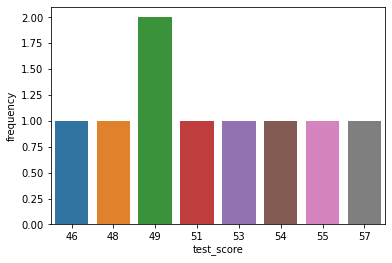

In [11]:
df = test_score_distribution.DataFrame()

%matplotlib inline
import seaborn as sns

sns.barplot(data = df, x='test_score',y='frequency')

In [13]:
%sql drop table INTERNATIONAL_STUDENT_TEST_SCORES

 * ibm_db_sa://rbq33661:***@dashdb-txn-sbox-yp-dal09-08.services.dal.bluemix.net:50000/BLUDB
Done.


[]